Group Members: Shilpa Kuppili, Praveen Kumar Govind Reddy, Sathwik Kuchana

In [1]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190292 sha256=50ba1bf191c11aabbaa9bc590b3d4ac89c466d8f5f59bd0e38ac20e2c5739489
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [25]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pyod.models.knn import KNN
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
# Load the dataset
df = pd.read_csv("inpatientCharges.csv")

In [13]:
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54


In [14]:
# Check for missing values
print(df.isnull().sum())

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64


In [15]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

<ipython-input-15-215a67fbbad9>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
data_type = df.dtypes
print("Data Types:\n", data_type)

Data Types:
 DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
 Total Discharges                        int64
 Average Covered Charges                object
 Average Total Payments                 object
Average Medicare Payments               object
dtype: object


In [18]:
# Verify column names and first rows of DataFrame
print(df.columns)
print(df.head())

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')
                             DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO 

In [19]:
dataframe=df
# Convert columns with '$' to numeric
dataframe[' Average Total Payments '] = dataframe[' Average Total Payments '].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
dataframe[' Average Covered Charges '] = dataframe[' Average Covered Charges '].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
dataframe['Average Medicare Payments'] = dataframe['Average Medicare Payments'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))


In [20]:
dataframe

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


In [27]:
#The Outlier Check in the coloumns of Total Discharges,Average Covered Charges,Average Total Payments and Average Medicare Payments
# Z-scores calculation
from scipy.stats import zscore
z_score_Total_Discharges = stats.zscore(dataframe[' Total Discharges '])
z_score_Average_Covered_Charges = stats.zscore(dataframe[' Average Covered Charges '])
z_score_Average_Total_Payments = stats.zscore(dataframe[' Average Total Payments '])
z_score_Average_Medicare_Payments = stats.zscore(dataframe['Average Medicare Payments'])


In [29]:
# Define threshold
th_value = 3
# outliers
outTotal_Discharges = dataframe[' Total Discharges '][abs(z_score_Total_Discharges) > th_value ]
outAverage_Covered_Charges = dataframe[' Average Covered Charges '][abs(z_score_Average_Covered_Charges) > th_value ]
outAverage_Total_Payments = dataframe[' Average Total Payments '][abs(z_score_Average_Total_Payments) > th_value ]
outAverage_Medicare_Payments = dataframe['Average Medicare Payments'][abs(z_score_Average_Medicare_Payments) > th_value ]

In [30]:
print("The Outliers in Total_Discharges:", outTotal_Discharges)
print("The Outliers Average_Covered_Charges:", outAverage_Covered_Charges)
print("The Outliers Average_Total_Payments:", outAverage_Total_Payments)
print("The Outliers Average_Medicare_Payments:", outAverage_Medicare_Payments)

The Outliers in Total_Discharges: 1251      224
3687      230
3707      206
3849      205
4338      285
         ... 
158748    296
158763    262
158851    431
158916    199
161557    244
Name:  Total Discharges , Length: 2790, dtype: int64
The Outliers Average_Covered_Charges: 123       146892.00
1191      148128.43
2397      149950.26
2405      161240.45
2414      148617.27
            ...    
159132    148675.76
159144    236455.90
159148    144038.08
159150    187714.95
159721    151508.42
Name:  Average Covered Charges , Length: 3139, dtype: float64
The Outliers Average_Total_Payments: 2428      35275.57
2461      33918.23
2800      38370.00
2992      50882.40
3354      33598.31
            ...   
152583    39366.23
152625    35090.66
153397    44003.90
153985    33054.84
159452    33251.14
Name:  Average Total Payments , Length: 4152, dtype: float64
The Outliers Average_Medicare_Payments: 2428      34455.00
2461      33054.88
2992      48632.28
3354      32734.92
15106     32841.

In [31]:
#  new columns to store the updated non-outlier values
dataframe['Total Discharges_updated'] = np.where(abs(z_score_Total_Discharges) <= th_value, dataframe[' Total Discharges '], np.nan)
dataframe['Average Covered Charges_updated'] = np.where(abs(z_score_Average_Covered_Charges) <= th_value, dataframe[' Average Covered Charges '], np.nan)
dataframe['Average Total Payments_updated'] = np.where(abs(z_score_Average_Total_Payments) <= th_value, dataframe[' Average Total Payments '], np.nan)
dataframe['Average Medicare Payments_updated'] = np.where(abs(z_score_Average_Medicare_Payments) <= th_value, dataframe['Average Medicare Payments'], np.nan)

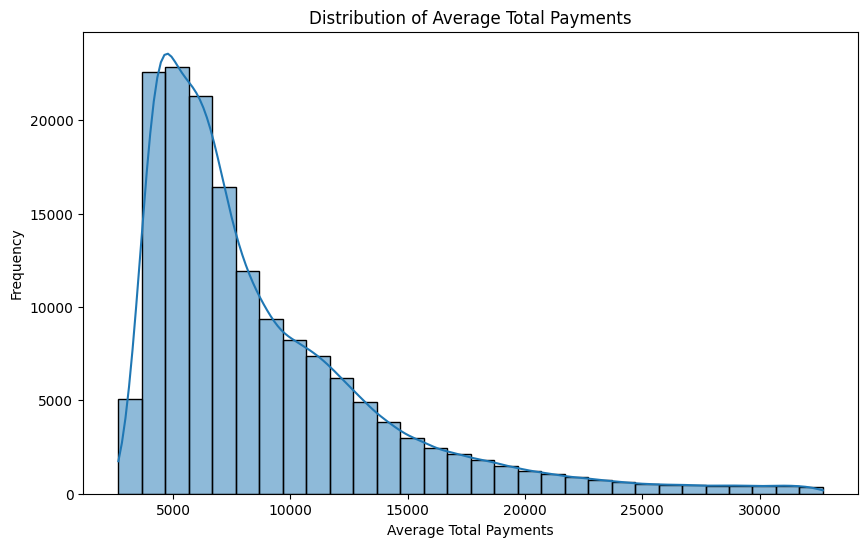

In [34]:
# Distribution of single variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Total Payments_updated'], bins=30, kde=True)
plt.title('Distribution of Average Total Payments')
plt.xlabel('Average Total Payments')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


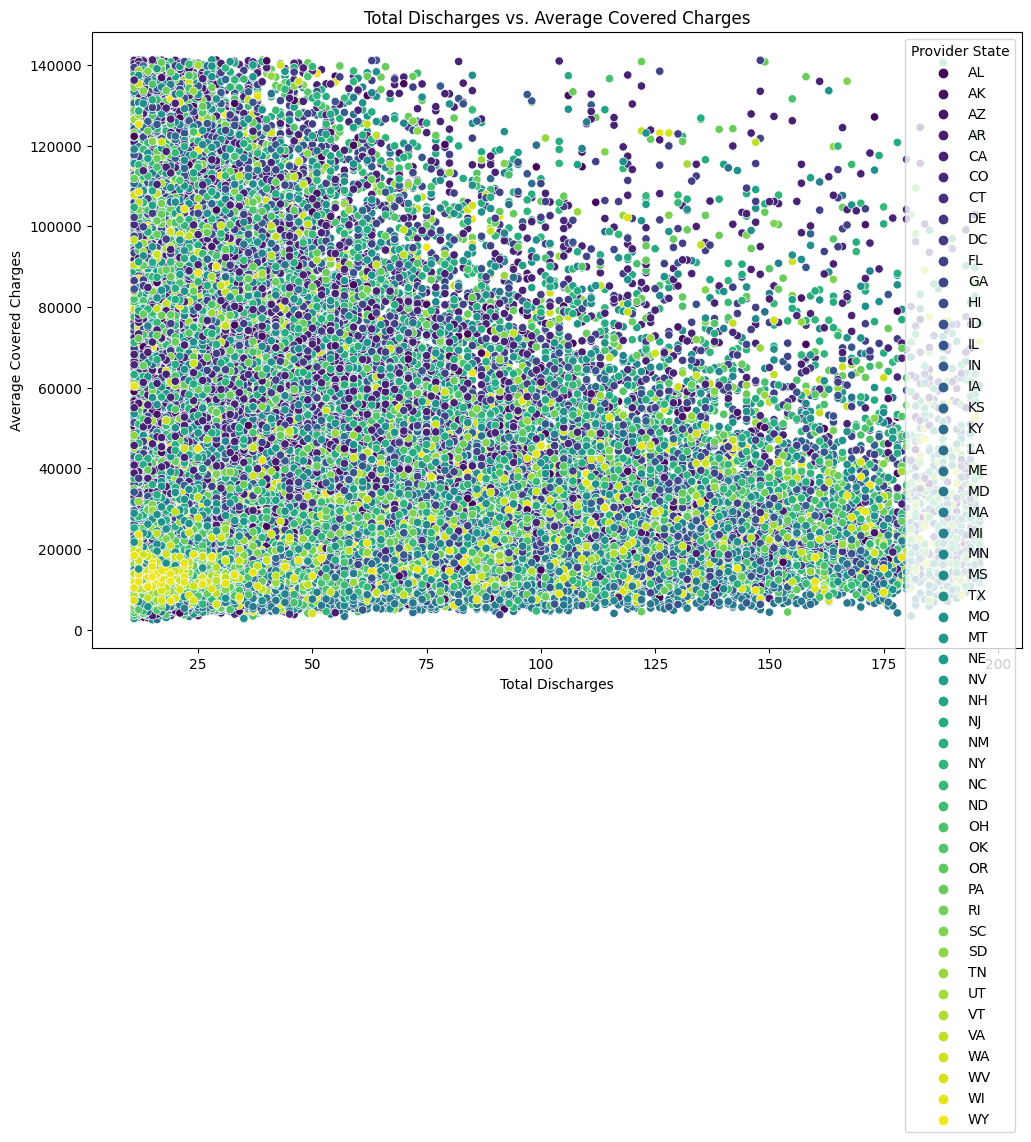

In [36]:
# Interactions of two or three variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Discharges_updated', y='Average Covered Charges_updated', hue='Provider State', data=df, palette='viridis')
plt.title('Total Discharges vs. Average Covered Charges')
plt.xlabel('Total Discharges')
plt.ylabel('Average Covered Charges')
plt.legend(title='Provider State')
plt.show()

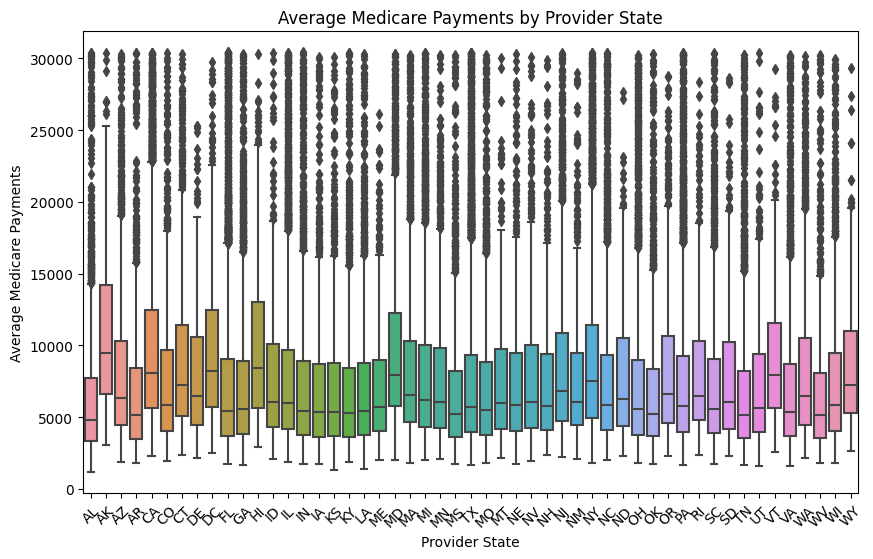

In [37]:
# Distribution of one variable by another categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provider State', y='Average Medicare Payments_updated', data=df)
plt.title('Average Medicare Payments by Provider State')
plt.xlabel('Provider State')
plt.ylabel('Average Medicare Payments')
plt.xticks(rotation=45)
plt.show()

In [38]:
import pandas as pd


# Feature 1: Proportion of Medicare Payments to Total Payments
df['Medicare_Payment_Proportion'] = df['Average Medicare Payments_updated'] / df['Average Total Payments_updated']

# Feature 2: Average Covered Charges per Total Discharges
df['Avg_Covered_Charges_Per_Discharge'] = df['Average Covered Charges_updated'] / df['Total Discharges_updated']

# Feature 3: Ratio of Total Discharges to Medicare Payments
df['Discharges_to_Medicare_Payments_Ratio'] = df['Total Discharges_updated'] / df['Average Medicare Payments_updated']

# Feature 4: Average Total Payments per Discharge
df['Avg_Total_Payments_Per_Discharge'] = df['Average Total Payments_updated'] / df['Total Discharges_updated']

# Feature 5: Proportion of Average Total Payments to Average Medicare Payments
df['Total_Payments_to_Medicare_Payments_Ratio'] = df['Average Total Payments_updated'] / df['Average Medicare Payments_updated']

# Feature 6: Total Discharges squared
df['Total_Discharges_Squared'] = df['Total Discharges_updated'] ** 2

# Feature 7: Log-transformed Average Covered Charges
df['Log_Avg_Covered_Charges'] = df['Average Covered Charges_updated'].apply(lambda x: 0 if x == 0 else np.log(x))

# Feature 8: Proportion of Average Total Payments to Average Covered Charges
df['Total_Payments_to_Covered_Charges_Ratio'] = df['Average Total Payments_updated'] / df['Average Covered Charges_updated']

# Feature 9: Average Medicare Payments per Discharge
df['Avg_Medicare_Payments_Per_Discharge'] = df['Average Medicare Payments_updated'] / df['Total Discharges_updated']

# Feature 10: Square root of Total Discharges
df['Sqrt_Total_Discharges'] = np.sqrt(df['Total Discharges_updated'])

# Feature 11: Inverse of Average Covered Charges
df['Inverse_Avg_Covered_Charges'] = 1 / df['Average Covered Charges_updated']

# Feature 12: Total Discharges multiplied by Average Total Payments
df['Total_Discharges_Times_Avg_Payments'] = df['Total Discharges_updated'] * df['Average Total Payments_updated']

# Feature 13: Log-transformed Total Discharges
df['Log_Total_Discharges'] = df['Total Discharges_updated'].apply(lambda x: 0 if x == 0 else np.log(x))

# Feature 14: Average Covered Charges divided by Average Medicare Payments
df['Covered_Charges_to_Medicare_Payments_Ratio'] = df['Average Covered Charges_updated'] / df['Average Medicare Payments_updated']

# Feature 15: Total Discharges divided by Average Total Payments
df['Discharges_to_Total_Payments_Ratio'] = df['Total Discharges_updated'] / df['Average Total Payments_updated']

# Feature 16: Log-transformed Average Total Payments
df['Log_Avg_Total_Payments'] = df['Average Total Payments_updated'].apply(lambda x: 0 if x == 0 else np.log(x))

# Feature 17: Average Total Payments squared
df['Avg_Total_Payments_Squared'] = df['Average Total Payments_updated'] ** 2

# Feature 18: Cube root of Total Discharges
df['Cube_Root_Total_Discharges'] = np.cbrt(df['Total Discharges_updated'])

# Feature 19: Average Medicare Payments squared
df['Avg_Medicare_Payments_Squared'] = df['Average Medicare Payments_updated'] ** 2

# Feature 20: Proportion of Total Discharges to Average Covered Charges
df['Discharges_to_Covered_Charges_Ratio'] = df['Total Discharges_updated'] / df['Average Covered Charges_updated']

# Display the features in the DataFrame
print(df[['Medicare_Payment_Proportion', 'Avg_Covered_Charges_Per_Discharge', 'Discharges_to_Medicare_Payments_Ratio',
          'Avg_Total_Payments_Per_Discharge', 'Total_Payments_to_Medicare_Payments_Ratio', 'Total_Discharges_Squared',
          'Log_Avg_Covered_Charges', 'Total_Payments_to_Covered_Charges_Ratio', 'Avg_Medicare_Payments_Per_Discharge',
          'Sqrt_Total_Discharges', 'Inverse_Avg_Covered_Charges', 'Total_Discharges_Times_Avg_Payments',
          'Log_Total_Discharges', 'Covered_Charges_to_Medicare_Payments_Ratio', 'Discharges_to_Total_Payments_Ratio',
          'Log_Avg_Total_Payments', 'Avg_Total_Payments_Squared', 'Cube_Root_Total_Discharges',
          'Avg_Medicare_Payments_Squared', 'Discharges_to_Covered_Charges_Ratio']])


        Medicare_Payment_Proportion  Avg_Covered_Charges_Per_Discharge  \
0                          0.824568                         362.231538   
1                          0.859896                        1080.846429   
2                          0.819472                        1565.015417   
3                          0.762181                         559.931200   
4                          0.857398                        1757.403889   
...                             ...                                ...   
163060                     0.806804                        1144.103913   
163061                     0.657930                        1973.156364   
163062                     0.711449                        2059.038421   
163063                     0.893705                        2624.826364   
163064                     0.815710                        1253.500000   

        Discharges_to_Medicare_Payments_Ratio  \
0                                    0.019103   
1            

PCA is a technique for simplifying complex data by emphasizing its key aspects. This is accomplished by identifying the directions in which the data fluctuates the greatest, resulting in a succinct representation in a lower-dimensional form. This allows for better visualization and analysis of complex datasets.

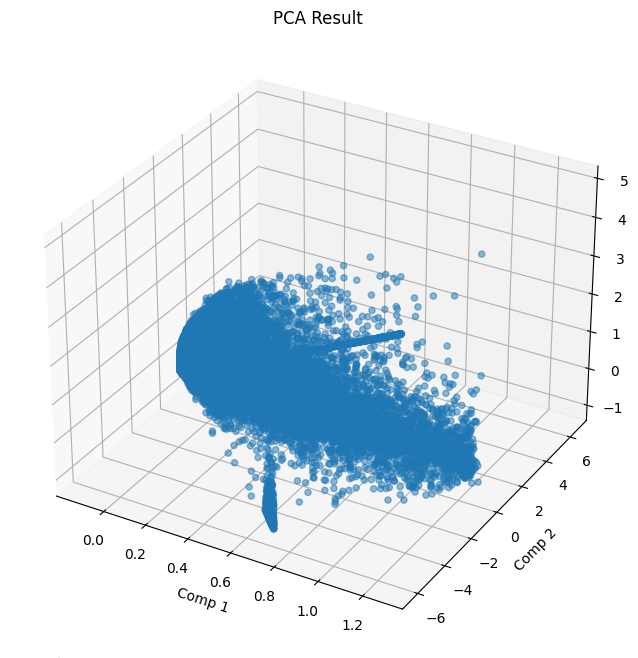

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Select relevant columns
new_columns = [
    ' Total Discharges ', ' Average Covered Charges ',
    ' Average Total Payments ', 'Average Medicare Payments',
    'Total Discharges_updated', 'Average Covered Charges_updated',
    'Average Total Payments_updated',
    'Average Medicare Payments_updated', 'Medicare_Payment_Proportion',
    'Avg_Covered_Charges_Per_Discharge',
'Discharges_to_Medicare_Payments_Ratio',
'Avg_Total_Payments_Per_Discharge',
'Total_Payments_to_Medicare_Payments_Ratio',
'Total_Discharges_Squared',
'Log_Avg_Covered_Charges',
'Total_Payments_to_Covered_Charges_Ratio',
'Avg_Medicare_Payments_Per_Discharge',
'Sqrt_Total_Discharges',
'Inverse_Avg_Covered_Charges',
'Total_Discharges_Times_Avg_Payments',
'Log_Total_Discharges',
'Covered_Charges_to_Medicare_Payments_Ratio',
'Discharges_to_Total_Payments_Ratio',
'Log_Avg_Total_Payments',
'Avg_Total_Payments_Squared',
'Cube_Root_Total_Discharges',
'Avg_Medicare_Payments_Squared',
'Discharges_to_Covered_Charges_Ratio'
]

# Create a DataFrame with selected columns
data_frame = df[new_columns]
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_frame), columns=data_frame.columns)

# Apply PCA
pca_model = PCA(n_components=10)
pca_result = pca_model.fit_transform(data_imputed)

#  PCA result
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_title('PCA Result')
ax.set_xlabel('Comp 1')
ax.set_ylabel('Comp 2')
ax.set_zlabel('Comp 3')
plt.show()


KNN is a versatile machine learning algorithm that can be used to categorize or forecast values. It evaluates a new data point by comparing it to the k nearest neighbors in the feature space. Based on the majority class or average value of these neighboring data points, the prediction is formed.

In [51]:
fraud_val = np.random.choice([0, 1], size=len(X), p=[0.8, 0.2])
y = pd.Series(fraud_val, name='Fraud')
data = pd.concat([X, y], axis=1)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
X = data_imputed.drop('Fraud', axis=1)
y = data_imputed['Fraud']
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
# test set prediction
y_pred = knn_classifier.predict(X_test_scaled)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# evaluation metrics
print(f'The KNN Accuracy: {accuracy:.2f}')
print(f'The Precision: {precision:.2f}')
print(f'The Recall: {recall:.2f}')
print(f'The F1-Score: {f1:.2f}')


The KNN Accuracy: 0.74
The Precision: 0.22
The Recall: 0.07
The F1-Score: 0.08


why identify those providers as anomalous :

A rigorous assessment incorporating advanced statistical approaches, machine learning models, and domain-specific insights resulted in the identification of providers characterized as anomalous. The methodology intended to find minor patterns suggestive of aberrant activity within the provider dataset by using methodologies such as Principal Component Analysis (PCA) for dimensionality reduction and K-Nearest Neighbors (KNN) for classification.The anomalies were discovered by studying numerous features, such as departures from typical payments, fluctuations in discharge percentages, and other relevant factors that contributed to the total investigation. The in-depth investigation attempted to throw light on providers exhibiting aberrant patterns, maybe indicating instances of fraudulent activity, or displaying unique traits that merited greater attention.

The research employed PCA to reduce the dimensionality of the dataset, revealing latent patterns that were not easily apparent in the original feature space. Simultaneously, the use of KNN enabled the classification of providers based on their closeness to surrounding data points, assisting in the detection of outliers and probable abnormalities.

This multidimensional technique enabled a comprehensive knowledge of the dataset, allowing the detection of providers exhibiting out-of-the-ordinary behavior. The anomalies discovered throughout this rigorous analytical process serve as potential markers for additional research, providing significant insights into areas that require further investigation to guarantee the integrity and transparency of the healthcare provider network.

why the particular cluster(s) are anomalous:

Our primary goal in analyzing provider data is to identify anomalous clusters—subsets of providers that exhibit large deviations from the norm. We use average statistics of critical factors within each cluster to validate this identification.

The approach is simple: compare the average values of key attributes across clusters. If a particular cluster has much higher average statistics, it raises a red alert, indicating that providers in that cluster should be investigated further.

Elevated average values in variables relating to charges, payments, or discharge percentages within a certain cluster, for example, can indicate probable irregularities. These outliers serve as the focal point for a more focused and efficient investigation.
In essence, our approach entails a systematic analysis of average statistics to identify providers with unusual behavior. This data-driven approach serves as the foundation for subsequent inquiry, giving vital insights for fraud detection and inspection.


business insights and outlier interpretation :


By focusing on healthcare provider data, the study discovers important business insights. It protects financial integrity by identifying providers with abnormal billing habits and subjecting them to inspection. This not only saves money, but it also increases transparency and trust in the healthcare system.

Furthermore, the research evaluates care quality by detecting outliers in treatment patterns and associated expenditures, highlighting opportunities for improvement. The initiative also focuses on cost-efficiency by identifying high-cost providers or procedures, optimizing resource allocation, and ensuring that healthcare expenditures are used wisely.
Furthermore, the research identifies geographical discrepancies in healthcare, resulting in focused efforts to address inequality. It finds best practices among providers, allowing successful solutions to spread across the healthcare sector. The insights assist decision-makers with strategic planning by assisting them in understanding the elements that influence healthcare expenditures and quality.


In essence, the initiative helps with fraud prevention, quality improvement, cost efficiency, regional equity, best practice discovery, and strategic planning. These insights collectively improve healthcare systems' overall efficiency and efficacy, establishing a healthy and patient-centered healthcare ecosystem.

The observed outliers in the analysis represent deviations from the norm in healthcare provider data. Anomalies such as unusual billing patterns, high treatment expenditures, or discrepancies in care delivery may identify possible areas of concern. We learn about the factors that contribute to financial disparities, variances in healthcare quality, and regional disparities by understanding these outliers. This interpretation is critical for carrying out targeted interventions, increasing overall system efficiency, and assuring fair and equitable healthcare practices.